In [0]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 



In [0]:

def preprocess(row):
    text = row['text']
    text = text.lower()
    
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    text = regex.sub(' ', text)
    
    # remove remaining tokens that are not alphabetic
    text = text.split(' ')

    text = [word for word in text if word.isalpha()]
    
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    stemmer = SnowballStemmer("english")
    lemmatizer = WordNetLemmatizer()
    stemmed_text = []
    for word in text:
        #stemmed_text.append(stemmer.stem(word))
        stemmed_text.append(lemmatizer.lemmatize(word))
        
    text = " ".join(stemmed_text)
    if text=='':
        text='empty'
    row['text'] = text
    return(row)
    


In [0]:
 
path = 'Train.csv'
df = pd.read_csv(path)


In [116]:
df.shape

(38000, 4)

In [0]:
df=df.dropna(subset=['text'])
columns = ['text', 'type','title']
data = df[columns]


In [0]:

real=data[data.type=='real']
fake=data[data.type=='fake']


In [119]:
print(real.shape,fake.shape)

(18134, 3) (19332, 3)


In [0]:
real_len_text=[]
real_len_title=[]
for i in range(0,len(real)):
  real_len_text.append(len(real['text'].iloc[i]))
  real_len_title.append(len(real['title'].iloc[i]))
fake_len_text=[]
fake_len_title=[]
for i in range(0,len(fake)):
  fake_len_text.append(len(fake['text'].iloc[i]))
  fake_len_title.append(len(fake['title'].iloc[i]))

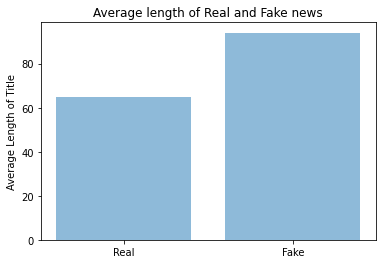

In [121]:
import matplotlib.pyplot as plt
objects = ('Real','Fake')
y_pos = np.arange(len(objects))
performance = [sum(real_len_title)/len(real_len_title),sum(fake_len_title)/len(fake_len_title)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Length of Title')
plt.title('Average length of Real and Fake news')

plt.show()

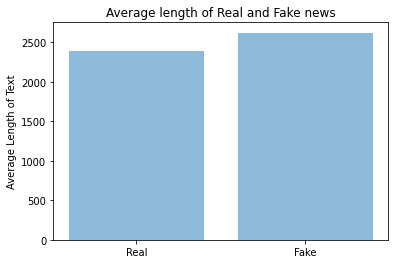

In [122]:
import matplotlib.pyplot as plt
objects = ('Real','Fake')
y_pos = np.arange(len(objects))
performance = [sum(real_len_text)/len(real_len_text),sum(fake_len_text)/len(fake_len_text)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Length of Text')
plt.title('Average length of Real and Fake news')

plt.show()

In [0]:
data = data.apply(preprocess, axis = 1)


In [0]:
real=data[data.type=='real']
fake=data[data.type=='fake']


In [125]:
print(real.shape,fake.shape)

(18134, 3) (19332, 3)


In [0]:
 


comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in real.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

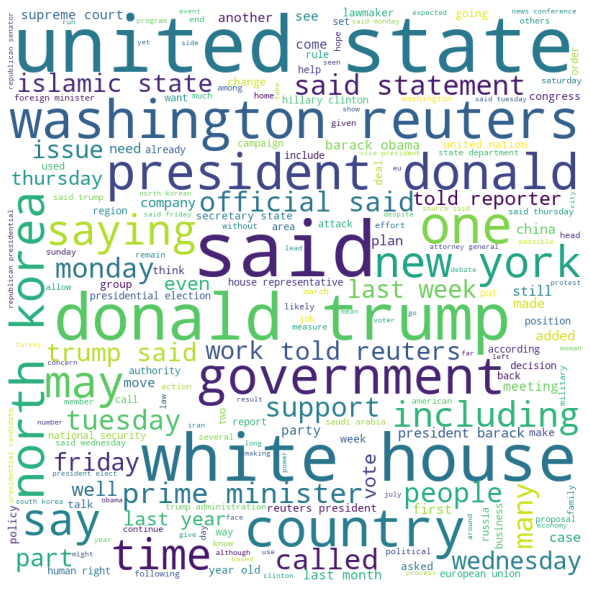

In [137]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show()

In [0]:
 


comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in fake.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

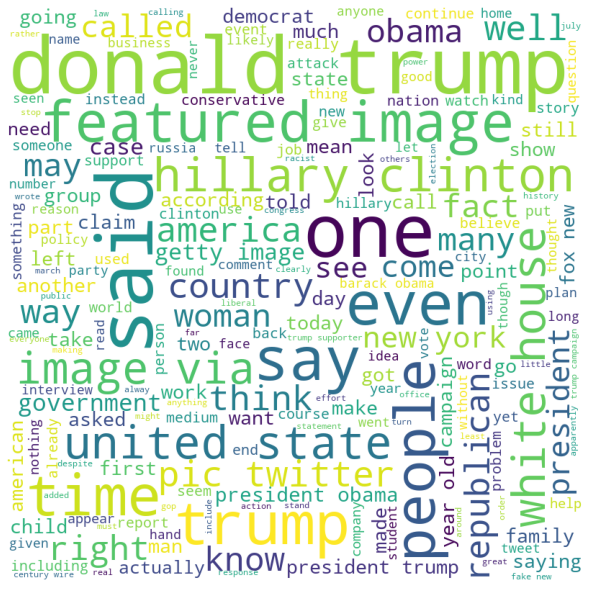

In [129]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show()

In [0]:
 


comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in real.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

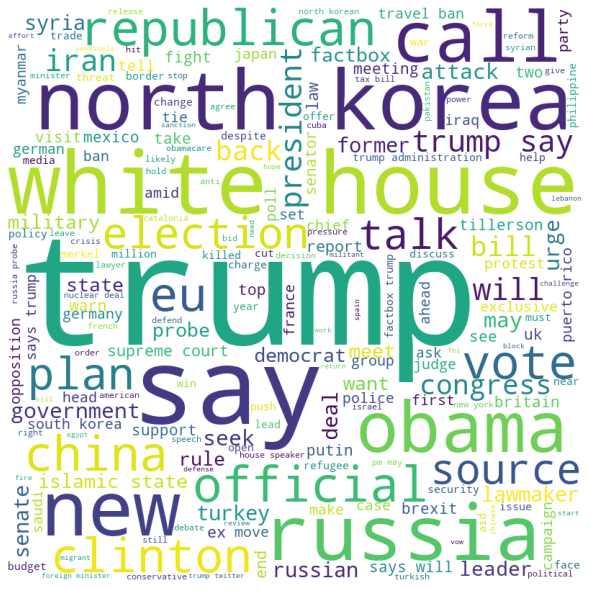

In [131]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show()

In [0]:
 


comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in fake.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

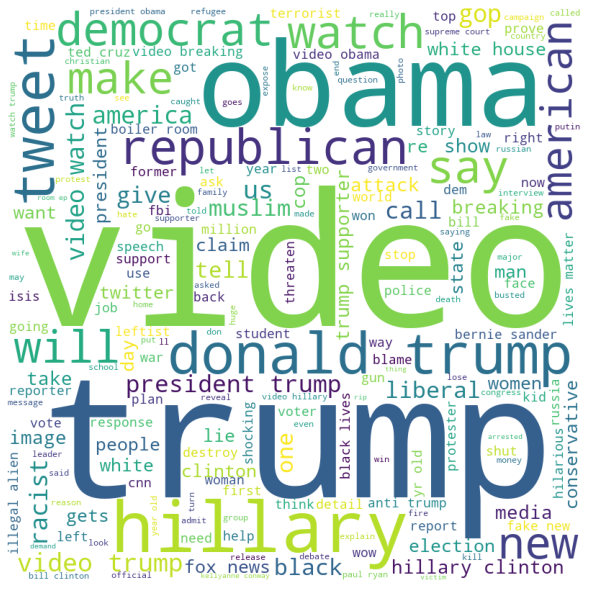

In [133]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show()